# USAir97 Dataset

## Preliminary steps

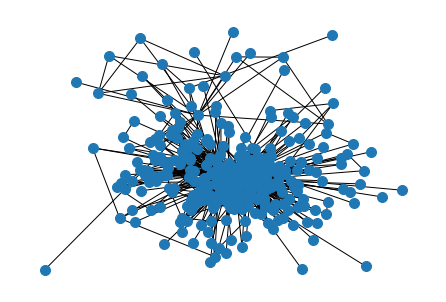

In [ ]:
import networkx as nx
from scipy.io import mmread
import numpy as np
import random as rd
import math

#import and print the dataset
a = mmread('inf-USAir97.mtx')
G = nx.from_scipy_sparse_array(a, edge_attribute='weight')
nx.draw(G, node_size = 100)

In [ ]:
#assign to each node a string with the name of the airport it corresponds to
i = 0
node_names = dict()
with open('node_names.txt','r') as file:   
    for line in file:
        node_names[i] = (line[1:-2])
        i += 1
nx.set_node_attributes(G, node_names, "Airport")

## DEGREES AND WEIGHTED DEGREES

In [ ]:
#Degree of $node in $graph
def nodeDegree(graph, node) :
    degree = 0
    for edge in graph.edges(node) :
        degree += 1
    return degree

#Weighted degree of $node in $graph
def weightedNodeDegree(graph, node) :
    degree = 0
    for neighbor in graph.neighbors(node) :
        degree += graph.get_edge_data(node, neighbor)["weight"]
    return degree

#Degrees of all nodes in $graph
#$function is the function to be used to compute the degree of a node
def graphDegrees(graph, function) :
    degrees_graph = {}
    for v in graph.nodes :
        degrees_graph[v] = function(graph, v)
    return degrees_graph

## CLOSENESS CENTRALITY

## Exact Algorithms

In [ ]:
#Exact closeness centrality of each node in $graph.
#Returns a dictionary with the name of the nodes as keys and their centralities as values.
def closenessCentralities(graph) :
    sum = []
    closeness_centralities = {}
    n = graph.number_of_nodes()
    for i in range(0, n) :
        sum.append(0)
    for v in range(0, n) :
        for u in range(0, n) :
            sum[v] = sum[v] + nx.dijkstra_path_length(graph, v, u, "weight")
        closeness_centralities[v] = (n - 1) / sum[v]
    return closeness_centralities

#Application of the algorithm on G
closeness_centr_dic = closenessCentralities(G)

In [ ]:
#smarter computation of closeness centralities
def fasterClosenessCentralities(graph) :
    sum = []
    closeness_centralities_faster = {}
    n = graph.number_of_nodes()
    for i in range(0, n) :
        sum.append(0)
    for v in range(0, n) :
        for u in range(v + 1, n) :
            shortest_weighted_path = nx.dijkstra_path_length(graph, v, u, "weight")
            sum[v] += shortest_weighted_path
            sum[u] += shortest_weighted_path
        closeness_centralities_faster[v] = (n - 1) / sum[v]
    return closeness_centralities_faster

#Application of the algorithm on G
faster_closeness_centr_dic = fasterClosenessCentralities(G)

## Eppstein-Wang algorithm

Approximated algorithm to compute the closeness centralities

In [ ]:
#Approximate closeness centrality of each node in $graph.
#Returns a dictionary with the name of the nodes as keys and their centralities as values.
def closenessEppsteinWang(graph, k = 100) :
    sum = []
    closeness_centralities_approx = {}
    n = graph.number_of_nodes()
    for i in range(0, n) :
        sum.append(0)
    for i in range(k) :
        v_i = rd.choice(list(graph.nodes()))
        for v in range(n) :
            sum[v] += nx.dijkstra_path_length(graph, v_i, v, "weight")
    for v in range(n) :
        closeness_centralities_approx[v] = 1 / (n * sum[v] / (k * (n - 1)))
    return closeness_centralities_approx

#Application of the algorithm on G
approx_closeness_centr_dic = closenessEppsteinWang(G)

In [ ]:
from random import randint

for i in range(10):
  num = randint(0, G.number_of_nodes() - 1)
  print("Exact VS Approximated closeness centrality for node %d: [%.4f | %.4f]" % (num, faster_closeness_centr_dic[num], approx_closeness_centr_dic[num]))

Exact VS Approximated closeness centrality for node 72: [5.8818 | 6.0182]
Exact VS Approximated closeness centrality for node 213: [5.0459 | 5.1970]
Exact VS Approximated closeness centrality for node 93: [6.1509 | 6.2888]
Exact VS Approximated closeness centrality for node 219: [5.8436 | 5.8557]
Exact VS Approximated closeness centrality for node 111: [5.9383 | 6.0465]
Exact VS Approximated closeness centrality for node 330: [1.4482 | 1.4482]
Exact VS Approximated closeness centrality for node 283: [5.1407 | 5.0381]
Exact VS Approximated closeness centrality for node 24: [3.2696 | 3.3984]
Exact VS Approximated closeness centrality for node 211: [5.2988 | 5.2650]
Exact VS Approximated closeness centrality for node 89: [6.1507 | 6.2952]


## BETWEENNESS CENTRALITY

In [ ]:
from random import choice

#computes the approximate betweenness centrality of $graph with $k iterations
def approxBetweennessCentr(graph, k = 100) :
    b = dict.fromkeys(list(graph.nodes()), 0)
    for i in range(k):
        stlist = rd.sample(list(graph.nodes()), 2)
        s = stlist[0]
        t = stlist[1]

        #the try-except block has to be added because we will generate random graphs
        #and they can be not connected
        try :
            shortest_paths = ([p for p in nx.all_shortest_paths(graph, s, t, "weight")])
            shortest_path = rd.sample(shortest_paths, 1)[0]
            for v in shortest_path:
                if v != s and v != t:
                    b[v] += 1/k
        except nx.NetworkXNoPath :
            #$t is not reachable from $s
            shortest_paths = {}
    return b

approx_betweenness_centr_dic = approxBetweennessCentr(G)

In [ ]:
#use the buil-in function of networkx
true_betweenness_centr_dic = nx.betweenness_centrality(G)

for i in range(10):
  num = randint(0, G.number_of_nodes() - 1)
  print("Exact VS Approximated betweenness centrality for node %d: [%f | %f]" % (num, true_betweenness_centr_dic[num], approx_betweenness_centr_dic[num]))

Exact VS Approximated betweenness centrality for node 65: [0.000012 | 0.000000]
Exact VS Approximated betweenness centrality for node 99: [0.000017 | 0.000000]
Exact VS Approximated betweenness centrality for node 124: [0.000364 | 0.000000]
Exact VS Approximated betweenness centrality for node 272: [0.001006 | 0.000000]
Exact VS Approximated betweenness centrality for node 168: [0.000165 | 0.000000]
Exact VS Approximated betweenness centrality for node 111: [0.032100 | 0.000000]
Exact VS Approximated betweenness centrality for node 116: [0.000000 | 0.000000]
Exact VS Approximated betweenness centrality for node 142: [0.000161 | 0.000000]
Exact VS Approximated betweenness centrality for node 181: [0.081547 | 0.140000]
Exact VS Approximated betweenness centrality for node 259: [0.000021 | 0.000000]


## CLUSTERING COEFFICIENT

## Exact Local Clustering Coefficient

In [ ]:
#computes local clustering coefficient of $v in $graph
def lcc(graph, v):
    num_tr = 0
    deg_v = 0
    for u_1 in graph.neighbors(v):
        deg_v += 1
        for u_2 in graph.neighbors(v):
            if graph.has_edge(u_1, u_2):
                num_tr += 1
    if(deg_v >= 2):
        return num_tr/(deg_v * (deg_v -1))
    else:
        return 0

In [ ]:
#computes the local clustering coefficients of all vertices in $graph
def lccs(graph):
    cc = dict()
    for v in graph.nodes():
        cc[v] = lcc(graph, v)
    return cc

## Approximated Local Clustering Coefficient

In [ ]:
#estimates the local clustering coefficients of all vertices in $graph with $k iterations
def estimate_lcc(graph, k = 10):
    z = {}
    minimum = {}
    cc = dict()
    for edge in graph.edges():
        z[edge] = 0
    for i in range(k):
        phi = np.random.permutation(graph.nodes())
        #print(phi)
        for v in graph.nodes():
            phi_neighborhood = []
            for u in graph.neighbors(v):
                phi_neighborhood.append(np.where(phi == u))
            minimum[v] = phi[min(phi_neighborhood)]
        for edge in graph.edges():
            if minimum[edge[0]] == minimum[edge[1]]:
                z[edge] += 1
    for v in graph.nodes():
        deg_v = 0
        factor = 0
        for u in graph.neighbors(v):
            deg_u = 0
            deg_v += 1
            for j in graph.neighbors(u):
                deg_u += 1
            if (v,u) in z:
                factor += (z[(v,u)] / (z[(v,u)] + k) ) * (deg_u + deg_v)
        if deg_v >= 2:
            cc[v] = ( (0.5 / (deg_v * (deg_v - 1))) * factor)
        else:
            cc[v] = 0
    return cc

## Clustering Coefficient Of A Graph

In [ ]:
#computes the clustering coefficient of $graph
def BetterCC(graph):
    numt = 0
    for u in graph.nodes:
        for v in list(graph.neighbors(u)):
            for z in list(graph.neighbors(u)):
                if (v != z and graph.has_edge(v, z)):
                    numt += 1
    return (numt / (6 * math.comb(graph.number_of_nodes(), 3)))

## Approximate Clustering Coefficient Of A Graph

In [ ]:
def pathLengthTwo(graph, u_z_equals = True):
    u = (rd.sample(graph.nodes, 1))[0]
    neigh = [n for n in graph.neighbors(u)]
    v = (rd.sample(neigh, 1))[0]
    neigh = [n for n in graph.neighbors(v)]
    z = (rd.sample(neigh, 1))[0]
    if not u_z_equals:
        while (u == z):
            z = (rd.sample(neigh, 1))[0]
    return u, v, z

#computes the approximate clustering coefficient of $graph
def ApproximateCC(graph, k):
    P = 0
    d = dict()
    for u in graph.nodes:
        d[u] = sum(1 for _ in graph.neighbors(u))
        P += (d[u] / 2) * (d[u] - 1)
    
    beta = dict()
    for i in range(k):
        u, v, z = pathLengthTwo(graph)
        if graph.has_edge(u, z):
            beta[i] = 1
        else:
            beta[i] = 0
    numt = (1 / k) * (sum(beta[i] for i in range(k))) * P/3
    return numt / math.comb(graph.number_of_nodes(), 3)

#print
print(ApproximateCC(G, 1000))

0.0012812374463522865


## Random graphs generation


In [ ]:
#find maximal weight
def maxWeight(graph) :
    max_weight = 0
    for v in graph.nodes :
        for u in graph.neighbors(v) :
           if (graph[v][u]["weight"] > max_weight) :
                max_weight = graph[v][u]["weight"]
    return max_weight

#find minimal weight
def minWeight(graph) :
    min_weight = 100
    for v in graph.nodes :
        for u in graph.neighbors(v) :
            if (graph[v][u]["weight"] < min_weight) :
                min_weight = graph[v][u]["weight"]
    return min_weight

#Generate a Erdos-Renyi-Gilbert random graph with uniformly chosen weights based on $graph
def oneRandomGraphGen(graph, p = 0.5) :
    #Erdos-Renyi random graphs: they are not weighted
    random_G = nx.gnp_random_graph(graph.number_of_nodes(), p)
    #Add uniformly chosen weights to the random graph. Wheights are chosen from $min_weight and $max_weight
    min_weight_G = minWeight(graph)
    max_weight_G = maxWeight(graph)
    random_weighted_edges = {}
    for edge in random_G.edges :
        random_weighted_edges[edge] = np.random.uniform(min_weight_G, max_weight_G)
    nx.set_edge_attributes(random_G, random_weighted_edges, "weight")    
    return random_G

#Generate $num_graphs Erdos-Renyi random graphs with uniformly chosen weights based on $graph
def randomGraphsGen(graph, num_graphs = 100, p = 0.5) :
    random_graphs = []
    for i in range(num_graphs) :
        random_graphs.append(oneRandomGraphGen(graph, p))
    return random_graphs

#generate 10 random graphs with expected number of edges equal to the number of edges of G
prob = G.number_of_edges() / np.math.comb(G.number_of_nodes(), 2)
list_random_graphs = randomGraphsGen(G, num_graphs = 10, p = prob)

## Random graphs with weights chosen in a normal distribution
Given a random Erdos-Renyi-Gilbert graph G(n, m), instead of choosing weights uniformly at random in [$minWeight(G), maxWeight(G)), we build a Normal distribution around the mean weight of G and use it to assign the weights to the random graphs.

In [ ]:
#compute the mean weight of $graph
def meanWeight(graph) :
    mean = 0
    for i, edge in enumerate(graph.edges()) :
        #we do not simply consider the sum to avoid overflow ($graph can be very large)
        mean = (mean * i + graph.get_edge_data(*edge)["weight"]) / (i + 1)
    return mean

#return a list containing the weights in $graph
def listWeights(graph) :
    weights = []
    for edge in graph.edges() :
        weights.append(graph.get_edge_data(*edge)["weight"])
    return weights

#return a weight sampled according to a normal distribution around the mean weight of $graph
#and with standard deviation equal to the standard deviation of weights in $graph.add_edge.
#only positive weights are accepted
def normalSampledWeight(graph, mean_weight_graph, std_graph) :
    sampled_weight = np.random.normal(mean_weight_graph, std_graph, 1)
    while sampled_weight < 0 :
        sampled_weight = np.random.normal(mean_weight_graph, std_graph, 1)
    
    #necessary otherwise an array of one element is returned
    return sampled_weight[0]

#Generate a Erdos-Renyi-Gilbert random graph with weights chosen in a normal distribution based on $graph
def oneRandomGraphNormalWeights(graph, mean_weight_graph, std_weights_graph, p = 0.5) :
    #Erdos-Renyi random graphs: they are not weighted
    random_G = nx.gnp_random_graph(graph.number_of_nodes(), p)

    #sample weights using a normal distribution obtained from $graph
    random_weighted_edges = {}
    for edge in random_G.edges :
        random_weighted_edges[edge] = normalSampledWeight(graph, mean_weight_graph, std_weights_graph)
    nx.set_edge_attributes(random_G, random_weighted_edges, "weight")    
    
    return random_G

#Generate $num_graphs Erdos-Renyi-Gilbert random graph with weights chosen in a normal distribution based on $graph
def randomGraphsNormalWeights(graph, num_graphs = 100, p = 0.5) :
    #compute the standard deviation of the weights of $graph
    weights_graph = listWeights(graph)
    std = np.std(weights_graph, ddof = 0)
    
    #compute the mean weight of $graph
    mean = meanWeight(graph)

    random_graphs = []
    for i in range(num_graphs) :
        random_graphs.append(oneRandomGraphNormalWeights(graph, mean, std, p))
    
    return random_graphs

#generate 10 random graphs with expected number of edges equal to the number of edges of G
list_random_graphs_normal = randomGraphsNormalWeights(G, num_graphs = 10, p = prob)

## Random graphs with same number of nodes and sequence of unweighted degrees as G
When an edge swap is made, we preserve the sequence of unweighted degrees of nodes in G. Example:
(u, v)[w1] and (w, z)[w2] are removed while (u, z)[w1] and (v, w)[w2] are added.
Remember also that k must be a multiple of the number of edges of G.

In [ ]:
import copy

#function to generate a random graph with same number of nodes and degree sequence as $graph
#$k is the factor by which the number of edges of $graph is multiplied to obtain the number of iterations
def oneRandomGraphSameDeg(graph, k = 1) :
    random_g = copy.deepcopy(graph)
    num_iterations = k * graph.number_of_edges()
    for i in range(num_iterations) :
        #sample two edges uniformly at random in $random_g
        edge_1 = rd.choice(list(random_g.edges()))
        edge_2 = rd.choice(list(random_g.edges()))
        
        #create the two edges that will replace $edge_1 and $edge_2 in $random_g
        new_edge_1 = (edge_1[0], edge_2[1])
        new_edge_2 = (edge_1[1], edge_2[0])

        #check that the $new_edge_1 and $new_edge_2 do not already exist in $random_g
        if (not random_g.has_edge(*new_edge_1)) and (not random_g.has_edge(*new_edge_2)) :
            #save the weights of $edge_1 and $edge_2 before removing them
            weight_1 = random_g.get_edge_data(*edge_1)["weight"]
            weight_2 = random_g.get_edge_data(*edge_2)["weight"]

            #remove $edge_1 and $edge_2 from $random_g
            random_g.remove_edge(*edge_1)
            random_g.remove_edge(*edge_2)

            #add $new_edge_1 and $new_edge_2 to $random_g
            random_g.add_edge(*new_edge_1)
            nx.set_edge_attributes(random_g, {(new_edge_1[0], new_edge_1[1]): weight_1}, "weight")
            random_g.add_edge(*new_edge_2)
            nx.set_edge_attributes(random_g, {(new_edge_2[0], new_edge_2[1]): weight_2}, "weight")

    return random_g

#generate a list of random graphs with same number of nodes and degree sequence as $graph
#$k is the factor by which the number of edges of $graph is multiplied to obtain the number of swaps attempted
def randGraphsDeg(graph, number_graphs = 100, k = 1) :
    list_graphs = []
    for i in range(number_graphs) :
        list_graphs.append(oneRandomGraphSameDeg(graph, k))
    return list_graphs

#generate 10 random graphs
list_random_graphs_degree = randGraphsDeg(G, number_graphs = 10, k = 1)

## Random graphs properties computation
1. Computation of some properties on the random graphs generated above.
2. Print of the computed properties for some random graphs chosen uniformly at random.

Note: 
- "u_" is used to indicate graphs with weights generated uniformly at random;
- "n_" is used to indicate graphs with weights taken from a normal distibution;
- "d_" is used to indicate graphs with same unweighted degrees sequence;

In [ ]:
#Prints $n elements of $list chosen uniformly at random.
#$list_name is a string identifying the $list.
#$element_name is a string identifying the type of elements contained in $list.
#Returns a list containing the indices of the randomly chosen elements in $list.
def print_n_random_in_list(list, n = 3, list_name = "list", element_name = "element") :
    print("\n" + list_name)
    indices_list = []
    for i in range(n) :
        indices_list.append(rd.choice(range(len(list))))
        print("\n" + element_name + " " + str(indices_list[i]) + ":")
        print(list[indices_list[i]])
    return indices_list

### Uniform weights: features computation

In [ ]:
#Weighted degrees
u_list_of_dic_degrees = []
for graph in list_random_graphs :
    u_list_of_dic_degrees.append(graphDegrees(graph, weightedNodeDegree))

#Closeness centrality: exact algorithm
u_list_of_dic_closeness = []
for graph in list_random_graphs :
    u_list_of_dic_closeness.append(nx.closeness_centrality(graph, distance = "weight"))

#Betweenness centrality: exact algorithm
u_list_of_dic_betweenness = []
for graph in list_random_graphs :
    u_list_of_dic_betweenness.append(nx.betweenness_centrality(graph, weight = "weight"))

#Betweenness centrality: approximate algorithm
u_list_of_dic_approx_betweenness = []
for graph in list_random_graphs :
    u_list_of_dic_approx_betweenness.append(approxBetweennessCentr(graph))

#Local clustering coefficient: exact algorithm
u_list_of_list_lccs = []
for graph in list_random_graphs :
    u_list_of_list_lccs.append(lccs(graph))

#Local clustering coefficient: approximate algorithm
u_list_of_list_approx_lccs = []
for graph in list_random_graphs :
    u_list_of_list_approx_lccs.append(estimate_lcc(graph))

### Uniform weights: print of results

In [ ]:
#Degrees of $n graphs chosen uniformly at random
#u_indices_degrees = print_n_random_in_list(u_list_of_dic_degrees, list_name = "degrees", element_name = "graph")

#Exact closeness centralities of $n graphs chosen uniformly at random
#u_indices_clos_centr = print_n_random_in_list(u_list_of_dic_closeness, list_name = "closeness",
#                                              element_name = "graph")

#Exact betweenness centralities of $n graphs chosen uniformly at random
#u_indices_betw_centr = print_n_random_in_list(u_list_of_dic_betweenness, list_name = "betweenness",
#                                              element_name = "graph")

#Approximate betweenness centralities of $n graphs chosen uniformly at random
#u_indices_approx_betw_centr = print_n_random_in_list(u_list_of_dic_approx_betweenness,
#                                                     list_name = "approx betweenness", element_name = "graph")

#Exact local clustering coeeficients of $n graphs chosen uniformly at random
#u_indices_lccs = print_n_random_in_list(u_list_of_list_lccs, list_name = "lccs", element_name = "graph")

#Approximate local clustering coeeficients of $n graphs chosen uniformly at random
#u_indices_approx_lccs = print_n_random_in_list(u_list_of_list_approx_lccs, list_name = "approx lccs",
#                                               element_name = "graph")

### Normal weights: features computation

In [ ]:
#Weighted degrees
n_list_of_dic_degrees = []
for graph in list_random_graphs_normal :
    n_list_of_dic_degrees.append(graphDegrees(graph, weightedNodeDegree))

#Closeness centrality: exact algorithm
n_list_of_dic_closeness = []
for graph in list_random_graphs_normal :
    n_list_of_dic_closeness.append(nx.closeness_centrality(graph, distance = "weight"))

#Betweenness centrality: exact algorithm
n_list_of_dic_betweenness = []
for graph in list_random_graphs_normal :
    n_list_of_dic_betweenness.append(nx.betweenness_centrality(graph, weight = "weight"))

#Betweenness centrality: approximate algorithm
n_list_of_dic_approx_betweenness = []
for graph in list_random_graphs_normal :
    n_list_of_dic_approx_betweenness.append(approxBetweennessCentr(graph))

#Local clustering coefficient: exact algorithm
n_list_of_list_lccs = []
for graph in list_random_graphs_normal :
    n_list_of_list_lccs.append(lccs(graph))

#Local clustering coefficient: approximate algorithm
n_list_of_list_approx_lccs = []
for graph in list_random_graphs_normal :
    n_list_of_list_approx_lccs.append(estimate_lcc(graph))

### Normal weights: print of results

In [ ]:
#Degrees of $n graphs chosen uniformly at random
#n_indices_degrees = print_n_random_in_list(n_list_of_dic_degrees,  list_name = "degrees", element_name = "graph")

#Exact closeness centralities of $n graphs chosen uniformly at random
#n_indices_clos_centr = print_n_random_in_list(n_list_of_dic_closeness,  list_name = "closeness",
#                                              element_name = "graph")

#Exact betweenness centralities of $n graphs chosen uniformly at random
#n_indices_betw_centr = print_n_random_in_list(n_list_of_dic_betweenness, list_name = "betweenness",
#                                              element_name = "graph")

#Approximate betweenness centralities of $n graphs chosen uniformly at random
#n_indices_approx_betw_centr = print_n_random_in_list(n_list_of_dic_approx_betweenness,
#                                                     list_name = "approx betweenness", element_name = "graph")

#Exact local clustering coeeficients of $n graphs chosen uniformly at random
#n_indices_lccs = print_n_random_in_list(n_list_of_list_lccs, list_name = "lccs", element_name = "graph")

#Approximate local clustering coeeficients of $n graphs chosen uniformly at random
#n_indices_approx_lccs = print_n_random_in_list(n_list_of_list_approx_lccs, list_name = "approx lccs",
#                                               element_name = "graph")

### Same degree sequence: features computation

In [ ]:
#Weighted degrees
d_list_of_dic_degrees = []
for graph in list_random_graphs_degree :
    d_list_of_dic_degrees.append(graphDegrees(graph, weightedNodeDegree))

#Closeness centrality: exact algorithm
d_list_of_dic_closeness = []
for graph in list_random_graphs_degree :
    d_list_of_dic_closeness.append(nx.closeness_centrality(graph, distance = "weight"))

#Betweenness centrality: exact algorithm
d_list_of_dic_betweenness = []
for graph in list_random_graphs_degree :
    d_list_of_dic_betweenness.append(nx.betweenness_centrality(graph, weight = "weight"))

#Betweenness centrality: approximate algorithm
d_list_of_dic_approx_betweenness = []
for graph in list_random_graphs_degree :
    d_list_of_dic_approx_betweenness.append(approxBetweennessCentr(graph))

#Local clustering coefficient: exact algorithm
d_list_of_list_lccs = []
for graph in list_random_graphs_degree :
    d_list_of_list_lccs.append(lccs(graph))

#Local clustering coefficient: approximate algorithm
d_list_of_list_approx_lccs = []
for graph in list_random_graphs_degree :
    d_list_of_list_approx_lccs.append(estimate_lcc(graph))

## Same unweighted degrees sequence: print of results

In [ ]:
#Degrees of $n graphs chosen uniformly at random
#d_indices_degrees = print_n_random_in_list(d_list_of_dic_degrees,  list_name = "degrees", element_name = "graph")

#Exact closeness centralities of $n graphs chosen uniformly at random
#d_indices_clos_centr = print_n_random_in_list(d_list_of_dic_closeness,  list_name = "closeness",
#                                              element_name = "graph")

#Exact betweenness centralities of $n graphs chosen uniformly at random
#d_indices_betw_centr = print_n_random_in_list(d_list_of_dic_betweenness, list_name = "betweenness",
#                                              element_name = "graph")

#Approximate betweenness centralities of $n graphs chosen uniformly at random
#d_indices_approx_betw_centr = print_n_random_in_list(d_list_of_dic_approx_betweenness,
#                                                     list_name = "approx betweenness", element_name = "graph")

#Exact local clustering coeeficients of $n graphs chosen uniformly at random
#d_indices_lccs = print_n_random_in_list(d_list_of_list_lccs, list_name = "lccs", element_name = "graph")

#Approximate local clustering coeeficients of $n graphs chosen uniformly at random
#d_indices_approx_lccs = print_n_random_in_list(d_list_of_list_approx_lccs, list_name = "approx lccs",
#                                               element_name = "graph")

## Monte Carlo approach
1. The random graphs have already been generated;
2. Features of interest have already been computed for all the graphs;
3. Now, we want to understand if some features of G are significant or not. To do so, we try to estimate some p_values.

### Utility functions

In [ ]:
#return the key of the largest value in the dictionary $dic
def keyMaxVal(dic) :
    key_max = list(dic.keys())[0]
    for key in dic :
        if dic[key] > dic[key_max] :
            key_max = key
    return key_max

#return the mean value in a dictionary $dic
def meanValDic(dic) :
    sum = 0
    for val in dic.values() :
        sum += val
    return sum / len(dic)

#return a list of values $mean_values
#$list_dic is a list of dictionaries
#$mean_values[i] is the mean value in the dictionary $list_dic[i]
def listMeanValsDic(list_dic) :
    mean_values = []
    for dic in list_dic :
        mean_values.append(meanValDic(dic))
    return mean_values

#return a list of indices $list_keys_largest
#$list_dic is a list of dictionaries
#$list_key_largest[i] is the key in the dictionary $list_dic[i] of the largest value in $list_dic[i]
def listKeysMax(list_dic) :
    list_keys_largest = []
    for dic in list_dic :
        list_keys_largest.append(keyMaxVal(dic))
    return list_keys_largest

#print $list_of_dict[i][list_of_keys[key]] for every key in $list_of_keys
def printGivenKeys(list_of_dict, list_of_keys) :
    for i,key in enumerate(list_of_keys) :
        print(list_of_dict[i][key])


#estimation of p-value: probab[$list_of_feature[i] >= $true_feature]
def estimatePVal(true_feature, list_of_features) :
    count = 0
    for feat in list_of_features :
        if feat > true_feature :
            count += 1
    return count / len(list_of_features)

#from a list of keys return the corresponding values in a list
def listValFromListKeys(list_of_dics, list_of_keys) :
    list_of_val = []
    for i,key in enumerate(list_of_keys) :
        list_of_val.append(list_of_dics[i][key])
    return list_of_val




### p-value highest closeness centrality

In [ ]:
#find the node with largest closeness centrality in $G
key_largest_cl = keyMaxVal(closeness_centr_dic)
print("\nReal network:")
print(closeness_centr_dic[key_largest_cl])

#find the nodes with largest closeness centrality in the random graphs with same degree sequence as $G
d_list_keys_largest_cl = listKeysMax(d_list_of_dic_closeness)
print("\nRandom graphs same degree sequence:")
printGivenKeys(d_list_of_dic_closeness, d_list_keys_largest_cl)

#find the nodes with largest closeness centrality in the random graphs with uniformly distributed weights
u_list_keys_largest_cl = listKeysMax(u_list_of_dic_closeness)
print("\nRandom graphs uniform:")
printGivenKeys(u_list_of_dic_closeness, u_list_keys_largest_cl)

#find the nodes with largest closeness centrality in the random graphs with uniformly distributed weights
n_list_keys_largest_cl = listKeysMax(n_list_of_dic_closeness)
print("\nRandom graphs normal:")
printGivenKeys(n_list_of_dic_closeness, n_list_keys_largest_cl)


Real network:
6.584273730737017

Random graphs same degree sequence:
25.22942772645508
26.999249567685727
26.285278655718443
30.470965128696097
27.16878298626787
26.055606284832646
27.522783210270727
24.479532596235632
26.968452613740045
24.916630910172167

Random graphs uniform:
4.810269385867323
5.199067356028289
5.768514438836298
5.151195672332205
4.856596526809841
4.909195293975372
5.625013887617374
5.424494277128061
5.50228960483875
5.744233563276338

Random graphs normal:
14.27243549809175
12.334464526103266
13.540169683013707
12.351546719338428
13.127660614766183
13.044862263648671
12.920443337607185
14.718617961068032
13.458112414675524
13.17748076425075


In [ ]:
#p-value for random graphs with same degree sequence
d_p_val = estimatePVal(closeness_centr_dic[key_largest_cl], listValFromListKeys(d_list_of_dic_closeness,
                                                                                d_list_keys_largest_cl))
print("\np_value same deg: " + str(d_p_val))

#p-value for random graphs with uniformly distributed weights
u_p_val = estimatePVal(closeness_centr_dic[key_largest_cl], listValFromListKeys(u_list_of_dic_closeness,
                                                                                u_list_keys_largest_cl))
print("\np_value uniform: " + str(u_p_val))

#p-value for random graphs with uniformly distributed weights
n_p_val = estimatePVal(closeness_centr_dic[key_largest_cl], listValFromListKeys(n_list_of_dic_closeness,
                                                                                n_list_keys_largest_cl))
print("\np_value normal: " + str(n_p_val))


p_value same deg: 1.0

p_value uniform: 0.0

p_value normal: 1.0


### p-value mean closeness centrality

In [ ]:
#find the mean closeness centrality of nodes in $G
mean_clos_G = meanValDic(closeness_centr_dic)
print("\nReal network:")
print(mean_clos_G)

#find the mean closeness centrality of nodes in the random graphs with same degree sequence as $G
d_mean_clos = listMeanValsDic(d_list_of_dic_closeness)
print("\nRandom graphs same degree sequence:")
print(d_mean_clos)

#find the mean closeness centrality of nodes in the random graphs with uniformly distributed weights
u_mean_clos = listMeanValsDic(u_list_of_dic_closeness)
print("\nRandom graphs uniform:")
print(u_mean_clos)

#find the mean closeness centrality of nodes in the random graphs with uniformly distributed weights
n_mean_clos = listMeanValsDic(n_list_of_dic_closeness)
print("\nRandom graphs normal:")
print(n_mean_clos)


Real network:
4.943537722155358

Random graphs same degree sequence:
[17.190646752735372, 18.146666765736732, 17.75866178394889, 18.87853968350296, 17.64808251343995, 17.490535856353773, 17.83898354371861, 17.131829237116573, 18.093205369844046, 16.994581670188126]

Random graphs uniform:
[3.557618993959747, 3.698115924468752, 3.9368050499104883, 3.7966421280140557, 3.6860252130435267, 3.6976162085621787, 3.7907883568699186, 3.7737410794915793, 3.8668203066277136, 4.0940764114740364]

Random graphs normal:
[10.024704603587711, 9.299565780316112, 10.410972569128635, 9.310096280532193, 9.931970750519277, 9.847535951577738, 9.971417050845035, 9.98673660357636, 10.293278672165657, 9.632638340330653]


In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_mean = estimatePVal(mean_clos_G, d_mean_clos)
print("\np_value same deg: " + str(d_p_val_mean))

#p-value for random graphs with uniformly distributed weights
u_p_val_mean = estimatePVal(mean_clos_G, u_mean_clos)
print("\np_value uniform: " + str(u_p_val_mean))

#p-value for random graphs with uniformly distributed weights
n_p_val_mean = estimatePVal(mean_clos_G, n_mean_clos)
print("\np_value normal: " + str(n_p_val_mean))


p_value same deg: 1.0

p_value uniform: 0.0

p_value normal: 1.0


### p-value highest betweenness centrality

In [ ]:
#find the node with largest betweennes centrality in $G
b_true = nx.betweenness_centrality(G, weight = "weight")
key_largest_bet = keyMaxVal(b_true)
print("\nReal network:")
print(b_true[key_largest_bet])

#find the nodes with largest betweenness centrality in the random graphs with same degree sequence as $G
d_list_keys_largest_bet = listKeysMax(d_list_of_dic_betweenness)
print("\nRandom graphs same degree sequence:")
printGivenKeys(d_list_of_dic_betweenness, d_list_keys_largest_bet)

#find the nodes with largest betweenness centrality in the random graphs with uniformly distributed weights
u_list_keys_largest_bet = listKeysMax(u_list_of_dic_betweenness)
print("\nRandom graphs uniform:")
printGivenKeys(u_list_of_dic_betweenness, u_list_keys_largest_bet)

#find the nodes with largest betweenness centrality in the random graphs with uniformly distributed weights
n_list_keys_largest_bet = listKeysMax(n_list_of_dic_betweenness)
print("\nRandom graphs normal:")
printGivenKeys(n_list_of_dic_betweenness, n_list_keys_largest_bet)


Real network:
0.1532957978577314

Random graphs same degree sequence:
0.174106625164027
0.20715005035246728
0.18708840672586893
0.25901766913851504
0.20363911013457842
0.15791601818792148
0.23339131496231197
0.15541517898013366
0.1543684579938356
0.18288931612194453

Random graphs uniform:
0.093472489242882
0.10471482193536574
0.15200952119381123
0.1126613567701181
0.074539961549025
0.09414995880252677
0.17447587659068023
0.1498306326100888
0.1488968232170649
0.143202416918429

Random graphs normal:
0.12177973084317495
0.06728920626201593
0.07122585370319509
0.08268790625286093
0.09856266593426714
0.07950196832372058
0.07023711434587568
0.18848301748603863
0.08396960541975648
0.09308797949281333


In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_bet = estimatePVal(b_true[key_largest_bet], listValFromListKeys(d_list_of_dic_betweenness,
                                                                                d_list_keys_largest_bet))
print("\np_value same deg: " + str(d_p_val_bet))

#p-value for random graphs with uniformly distributed weights
u_p_val_bet = estimatePVal(b_true[key_largest_bet], listValFromListKeys(u_list_of_dic_betweenness,
                                                                                u_list_keys_largest_bet))
print("\np_value uniform: " + str(u_p_val_bet))

#p-value for random graphs with uniformly distributed weights
n_p_val_bet = estimatePVal(b_true[key_largest_bet], listValFromListKeys(n_list_of_dic_betweenness,
                                                                                n_list_keys_largest_bet))
print("\np_value normal: " + str(n_p_val_bet))


p_value same deg: 1.0

p_value uniform: 0.1

p_value normal: 0.1


### p-value mean betweenness centrality

In [ ]:
#find the mean betweenness centrality of nodes in $G
mean_bet_G = meanValDic(b_true)
print("\nReal network:")
print(mean_bet_G)

#find the mean betweenness centrality of nodes in the random graphs with same degree sequence as $G
d_mean_bet = listMeanValsDic(d_list_of_dic_betweenness)
print("\nRandom graphs same degree sequence:")
print(d_mean_bet)

#find the mean betweenness centrality of nodes in the random graphs with uniformly distributed weights
u_mean_bet = listMeanValsDic(u_list_of_dic_betweenness)
print("\nRandom graphs uniform:")
print(u_mean_bet)

#find the mean betweenness centrality of nodes in the random graphs with uniformly distributed weights
n_mean_bet = listMeanValsDic(n_list_of_dic_betweenness)
print("\nRandom graphs normal:")
print(n_mean_bet)


Real network:
0.0066411512122817925

Random graphs same degree sequence:
[0.010941835638810852, 0.010537402746571755, 0.01103106465962725, 0.011068649770739096, 0.010924419549478703, 0.010399406837273107, 0.010958578431642895, 0.010242328831944095, 0.011028486370640477, 0.010767950498322142]

Random graphs uniform:
[0.01279349752760011, 0.013236466878224244, 0.013794645762395927, 0.012533242003995113, 0.012272931329823563, 0.01300003639937393, 0.013316931554837862, 0.013343789880753444, 0.013159200934471208, 0.013549887547994778]

Random graphs normal:
[0.011727547377094208, 0.010884019461531932, 0.011825329331608219, 0.011129935837830866, 0.010802010569054575, 0.011346732714985179, 0.010892181745383075, 0.012050067890347434, 0.010822471429248994, 0.010820927213385257]


In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_mean_bet = estimatePVal(mean_bet_G, d_mean_bet)
print("\np_value same deg: " + str(d_p_val_mean_bet))

#p-value for random graphs with uniformly distributed weights
u_p_val_mean_bet = estimatePVal(mean_bet_G, u_mean_bet)
print("\np_value uniform: " + str(u_p_val_mean_bet))

#p-value for random graphs with uniformly distributed weights
n_p_val_mean_bet = estimatePVal(mean_bet_G, n_mean_bet)
print("\np_value normal: " + str(n_p_val_mean_bet))


p_value same deg: 1.0

p_value uniform: 1.0

p_value normal: 1.0


## Other p-values
In this section, we compute other p-values, in order to better understand the results that we have obtained.
More precisely:
1. P[mean_closeness_centr_random_graph <= mean_closeness_centr_G]
2. P[mean_betweenness_centr_random_graph <= mean_betweenness_centr_G]
3. P[lowest_closeness_centr_random_graph <= lowest_closeness_centr_G]
4. P[lowest_betweenness_centr_random_graph <= lowest_betweenness_centr_G]

Actually the first two can be easily computed from previous p-values (1 - p_val).
The second two are more interesting.

### Utility functions

In [ ]:
#return the key of the lowest value in the dictionary $dic
def keyMinVal(dic) :
    key_min = list(dic.keys())[0]
    for key in dic :
        if dic[key] < dic[key_min] :
            key_min = key
    return key_min

#return a list of indices $list_keys_lowest
#$list_dic is a list of dictionaries
#$list_key_lowest[i] is the key in the dictionary $list_dic[i] of the lowest value in $list_dic[i]
def listKeysMin(list_dic) :
    list_keys_lowest = []
    for dic in list_dic :
        list_keys_lowest.append(keyMinVal(dic))
    return list_keys_lowest

#estimation of p-value: probab[$list_of_feature[i] <= $true_feature]
def estimatePValLow(true_feature, list_of_features) :
    count = 0
    for feat in list_of_features :
        if feat <= true_feature :
            count += 1
    return count / len(list_of_features)

### P[mean_closeness_centr_random_graph < mean_closeness_centr_G]

In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_less_mean = 1 - d_p_val_mean
print("\np_value same deg: " + str(d_p_val_less_mean))

#p-value for random graphs with uniformly distributed weights
u_p_val_less_mean = 1 - u_p_val_mean
print("\np_value uniform: " + str(u_p_val_less_mean))

#p-value for random graphs with uniformly distributed weights
n_p_val_less_mean = 1 - n_p_val_mean
print("\np_value normal: " + str(n_p_val_less_mean))


p_value same deg: 0.0

p_value uniform: 1.0

p_value normal: 0.0


### P[mean_betweenness_centr_random_graph <= mean_betweenness_centr_G]

In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_less_mean_bet = 1 - d_p_val_mean_bet
print("\np_value same deg: " + str(d_p_val_less_mean_bet))

#p-value for random graphs with uniformly distributed weights
u_p_val_less_mean_bet = 1 - u_p_val_mean_bet
print("\np_value uniform: " + str(u_p_val_less_mean_bet))

#p-value for random graphs with uniformly distributed weights
n_p_val_less_mean_bet = 1 - n_p_val_mean_bet
print("\np_value normal: " + str(n_p_val_less_mean_bet))


p_value same deg: 0.0

p_value uniform: 0.0

p_value normal: 0.0


### P[lowest_closeness_centr_random_graph <= lowest_closeness_centr_G]

In [ ]:
#find the node with lowest closeness centrality in $G
key_lowest_cl = keyMinVal(closeness_centr_dic)
print("\nReal network:")
print(closeness_centr_dic[key_lowest_cl])

#find the nodes with lowest closeness centrality in the random graphs with same degree sequence as $G
d_list_keys_lowest_cl = listKeysMin(d_list_of_dic_closeness)
print("\nRandom graphs same degree sequence:")
printGivenKeys(d_list_of_dic_closeness, d_list_keys_lowest_cl)

#find the nodes with lowest closeness centrality in the random graphs with uniformly distributed weights
u_list_keys_lowest_cl = listKeysMin(u_list_of_dic_closeness)
print("\nRandom graphs uniform:")
printGivenKeys(u_list_of_dic_closeness, u_list_keys_lowest_cl)

#find the nodes with lowest closeness centrality in the random graphs with uniformly distributed weights
n_list_keys_lowest_cl = listKeysMin(n_list_of_dic_closeness)
print("\nRandom graphs normal:")
printGivenKeys(n_list_of_dic_closeness, n_list_keys_lowest_cl)


Real network:
1.3360803036736968

Random graphs same degree sequence:
2.2548451922749426
4.038575102855555
3.6730151015294634
4.246905596805712
4.439586085720224
3.8228507147922377
2.5553235263464678
2.559688692362539
4.519616638197177
2.5597540161457815

Random graphs uniform:
1.9655702934708272
1.863881130968543
1.9688175510862347
2.207476590178522
2.0241382194138247
1.9759985748486935
1.9117950214571393
1.946854023595501
2.103635273327602
2.1677027156699933

Random graphs normal:
6.1861765185935
6.147842819105812
5.812059972670094
3.139349815157516
5.428786502914579
6.3090313223833165
6.4051548863638725
3.7988965580100786
6.348547310114607
5.86545853840966


In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_less = estimatePValLow(closeness_centr_dic[key_lowest_cl], listValFromListKeys(d_list_of_dic_closeness,
                                                                                d_list_keys_lowest_cl))
print("\np_value same deg: " + str(d_p_val_less))

#p-value for random graphs with uniformly distributed weights
u_p_val_less = estimatePValLow(closeness_centr_dic[key_lowest_cl], listValFromListKeys(u_list_of_dic_closeness,
                                                                                u_list_keys_lowest_cl))
print("\np_value uniform: " + str(u_p_val_less))

#p-value for random graphs with uniformly distributed weights
n_p_val_less = estimatePValLow(closeness_centr_dic[key_lowest_cl], listValFromListKeys(n_list_of_dic_closeness,
                                                                                n_list_keys_lowest_cl))
print("\np_value normal: " + str(n_p_val_less))


p_value same deg: 0.0

p_value uniform: 0.0

p_value normal: 0.0


### P[lowest_betweenness_centr_random_graph <= lowest_betweenness_centr_G]

In [ ]:
#find the node with lowest betweennes centrality in $G
b_true = nx.betweenness_centrality(G, weight = "weight")
key_lowest_bet = keyMinVal(b_true)
print("\nReal network:")
print(b_true[key_lowest_bet])

#find the nodes with lowest betweenness centrality in the random graphs with same degree sequence as $G
d_list_keys_lowest_bet = listKeysMin(d_list_of_dic_betweenness)
print("\nRandom graphs same degree sequence:")
printGivenKeys(d_list_of_dic_betweenness, d_list_keys_lowest_bet)

#find the nodes with lowest betweenness centrality in the random graphs with uniformly distributed weights
u_list_keys_lowest_bet = listKeysMin(u_list_of_dic_betweenness)
print("\nRandom graphs uniform:")
printGivenKeys(u_list_of_dic_betweenness, u_list_keys_lowest_bet)

#find the nodes with lowest betweenness centrality in the random graphs with uniformly distributed weights
n_list_keys_lowest_bet = listKeysMin(n_list_of_dic_betweenness)
print("\nRandom graphs normal:")
printGivenKeys(n_list_of_dic_betweenness, n_list_keys_lowest_bet)


Real network:
0.0

Random graphs same degree sequence:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

Random graphs uniform:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

Random graphs normal:
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


From the above, we think that it is nonsense to continue with the computation of the desired probability, because all values are 0 with extremely high probability

### Clustering coefficients comparison

In [ ]:
#compute the clustering coefficient of each graph in $list_of_graphs
#the ccs are returned as a list
def ccListGraphs(list_of_graphs) :
    ccs = []
    for graph in list_of_graphs :
        ccs.append(BetterCC(graph))
    return ccs

#clustering coefficient of the real network
cc_G = BetterCC(G)
print("\ncc(G) = " + str(cc_G) + "\n")

#list clustering coefficients of random graphs with uniformly distributed weights
list_ccs_u = ccListGraphs(list_random_graphs)
print(list_ccs_u)

#P[cc(random_graph) >= cc(real_network)]
p_val_cc_u = estimatePVal(cc_G, list_ccs_u)
print("\np_val_u = " + str(p_val_cc_u) + "\n")

#list clustering coefficients of random graphs with normally distributed weights
list_ccs_n = ccListGraphs(list_random_graphs_normal)
print(list_ccs_n)

#P[cc(random_graph) >= cc(real_network)]
p_val_cc_n = estimatePVal(cc_G, list_ccs_n)
print("\np_val_n = " + str(p_val_cc_n) + "\n")

#list clustering coefficients of random graphs with same degree sequence
list_ccs_d = ccListGraphs(list_random_graphs_degree)
print(list_ccs_d)

#P[cc(random_graph) >= cc(real_network)]
p_val_cc_d = estimatePVal(cc_G, list_ccs_d)
print("\np_val_d = " + str(p_val_cc_d) + "\n")


cc(G) = 0.002015367153866772

[5.542631939457914e-05, 5.32754472986701e-05, 6.618067987412434e-05, 5.4599060896152585e-05, 5.029731670433451e-05, 4.8642799707481395e-05, 6.353345267915938e-05, 5.129002690244637e-05, 5.608812619332038e-05, 6.320254927978875e-05]

p_val_u = 0.0

[5.9728063586397223e-05, 5.4102705797096655e-05, 5.5095415995208516e-05, 5.426815749678196e-05, 5.79080948898588e-05, 4.947005820590795e-05, 6.187893568230626e-05, 4.8642799707481395e-05, 5.79080948898588e-05, 6.187893568230626e-05]

p_val_n = 0.0

[0.0014354037959031954, 0.0014186380236684171, 0.0013912281920872172, 0.0014612694116206656, 0.0014388782815965867, 0.0013943166238146764, 0.0014715274170011548, 0.001431157202277939, 0.0014143914300431609, 0.0014648541984471806]

p_val_d = 0.0



## Analyses of the degree of nodes

### Largest degree of nodes

In [ ]:
#computation of the weighted degree of all nodes in $G
degrees_G = graphDegrees(G, weightedNodeDegree)

#node with largest degree in $G
node_max_deg_G = keyMaxVal(degrees_G)
print("largest degree in G = " + str(degrees_G[node_max_deg_G]) + "\n")

#computation of the weighted degree of all nodes in all random graphs with uniform weights
list_nodes_max_deg_u = listKeysMax(u_list_of_dic_degrees)
print("\nRandom graphs uniform weights:")
printGivenKeys(u_list_of_dic_degrees, list_nodes_max_deg_u)

#computation of the weighted degree of all nodes in all random graphs with normal weights
list_nodes_max_deg_n = listKeysMax(n_list_of_dic_degrees)
print("\nRandom graphs uniform weights:")
printGivenKeys(n_list_of_dic_degrees, list_nodes_max_deg_n)

#computation of the weighted degree of all nodes in all random graphs with same degree sequence
list_nodes_max_deg_d = listKeysMax(d_list_of_dic_degrees)
print("\nRandom graphs with same degree sequence:")
printGivenKeys(d_list_of_dic_degrees, list_nodes_max_deg_d)


largest degree in G = 11.334099999999994


Random graphs uniform weights:
7.536864965003525
6.685400270404594
8.007159923485435
7.794589164290151
7.1805277897593625
6.795533278521935
6.633648184237207
6.230828398105116
6.578550641717207
7.226874109277719

Random graphs uniform weights:
2.4661518139175147
2.4104258107785728
2.4563234492326345
2.483491131178432
2.226363808468674
2.38608342488493
2.769948804723456
2.242678922267606
2.2567243548076354
2.255200504267134

Random graphs with same degree sequence:
10.9569
10.728499999999999
11.1157
10.816300000000004
11.547299999999998
10.8938
11.639899999999997
11.558600000000004
10.425999999999998
11.135000000000005


### P[max_deg_random_graph > max_deg_real_network]

In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_deg = estimatePVal(degrees_G[node_max_deg_G], listValFromListKeys(d_list_of_dic_degrees,
                                                                                list_nodes_max_deg_d))
print("\np_value same deg: " + str(d_p_val_deg))

#p-value for random graphs with uniformly distributed weights
u_p_val_deg = estimatePVal(degrees_G[node_max_deg_G], listValFromListKeys(u_list_of_dic_degrees,
                                                                                list_nodes_max_deg_u))
print("\np_value uniform: " + str(u_p_val_deg))

#p-value for random graphs with uniformly distributed weights
n_p_val_deg = estimatePVal(degrees_G[node_max_deg_G], listValFromListKeys(n_list_of_dic_degrees,
                                                                                list_nodes_max_deg_n))
print("\np_value normal: " + str(n_p_val_deg))


p_value same deg: 0.3

p_value uniform: 0.0

p_value normal: 0.0


### Lowest degree of nodes

In [ ]:
#node with lowest degree in $G
node_min_deg_G = keyMinVal(degrees_G)
print("lowest degree in G = " + str(degrees_G[node_min_deg_G]) + "\n")

#computation of the weighted degree of all nodes in all random graphs with uniform weights
list_nodes_min_deg_u = listKeysMin(u_list_of_dic_degrees)
print("\nRandom graphs uniform weights:")
printGivenKeys(u_list_of_dic_degrees, list_nodes_min_deg_u)

#computation of the weighted degree of all nodes in all random graphs with normal weights
list_nodes_min_deg_n = listKeysMin(n_list_of_dic_degrees)
print("\nRandom graphs uniform weights:")
printGivenKeys(n_list_of_dic_degrees, list_nodes_min_deg_n)

#computation of the weighted degree of all nodes in all random graphs with same degree sequence
list_nodes_min_deg_d = listKeysMin(d_list_of_dic_degrees)
print("\nRandom graphs with same degree sequence:")
printGivenKeys(d_list_of_dic_degrees, list_nodes_min_deg_d)


lowest degree in G = 0.0009


Random graphs uniform weights:
0.805855582938325
1.003194598716029
0.4912748655112593
1.1036621260742256
0.6913285853942788
0.9385146875706101
0.7425618801704351
0.37832054793711667
0.7179188566282453
0.45466978226084087

Random graphs uniform weights:
0.2567091768698617
0.3014883860729227
0.11431448124491231
0.18745058136634685
0.41777565957540413
0.31141560346366426
0.2905244980990149
0.13505411969991202
0.316708509144671
0.22093279798779097

Random graphs with same degree sequence:
0.005
0.0048
0.005
0.0011
0.0011
0.0009
0.0009
0.0011
0.0009
0.0011


### P[min_deg_random_graph <= min_deg_real_network]

In [ ]:
#p-value for random graphs with same degree sequence
d_p_val_less_deg = estimatePValLow(degrees_G[node_min_deg_G], listValFromListKeys(d_list_of_dic_degrees,
                                                                                list_nodes_min_deg_d))
print("\np_value same deg: " + str(d_p_val_less_deg))

#p-value for random graphs with uniformly distributed weights
u_p_val_less_deg = estimatePValLow(degrees_G[node_min_deg_G], listValFromListKeys(u_list_of_dic_degrees,
                                                                                list_nodes_min_deg_u))
print("\np_value uniform: " + str(u_p_val_less_deg))

#p-value for random graphs with uniformly distributed weights
n_p_val_less_deg = estimatePValLow(degrees_G[node_min_deg_G], listValFromListKeys(n_list_of_dic_degrees,
                                                                                list_nodes_min_deg_n))
print("\np_value normal: " + str(n_p_val_less_deg))


p_value same deg: 0.3

p_value uniform: 0.0

p_value normal: 0.0


# Analysis

In [ ]:
def topBottomK(dic, k) :
    sorted_closeness_centralities = sorted(dic.items(), key = lambda x : x[1], reverse = True)
    top_k = [key for key, value in sorted_closeness_centralities[:k]]
    bottom_k = [key for key, value in sorted_closeness_centralities[-k:]]
    return top_k, bottom_k

def printAirport(graph, values, nodes):
    for node in nodes:
        print("%s : %.4f" % (graph.nodes[node]['Airport'], values[node]))
        #print(graph.nodes[node]['Airport'], ":", values[node])
    print("\n")

In [ ]:
weighted_degrees = graphDegrees(G, weightedNodeDegree)
local_clustering_coeffs_G = lccs(G)

top_5, bottom_5 = topBottomK(weighted_degrees, 5)
print("Top 5 weighted degree airports:")
printAirport(G, weighted_degrees, top_5)
print("Bottom 5 weighted degree airports:")
printAirport(G, weighted_degrees, bottom_5)

top_5, bottom_5 = topBottomK(closeness_centr_dic, 5)
print("Top 5 closeness centrality airports:")
printAirport(G, closeness_centr_dic, top_5)
print("Bottom 5 closeness centrality airports:")
printAirport(G, closeness_centr_dic, bottom_5)

top_5, bottom_5 = topBottomK(b_true, 5)
print("Top 5 betweenness centrality airports:")
printAirport(G, b_true, top_5)
print("Bottom 5 betwenness centrality airports:")
printAirport(G, b_true, bottom_5)

top_5, bottom_5 = topBottomK(local_clustering_coeffs_G, 5)
print("Top 5 lcc airports:")
printAirport(G, local_clustering_coeffs_G, top_5)
print("Bottom 5 lcc airports:")
printAirport(G, local_clustering_coeffs_G, bottom_5)

Top 5 weighted degree airports:
Chicago O'hare Intl : 11.3341
Dallas/Fort Worth Intl : 9.5917
Los Angeles Intl : 7.9807
Minneapolis-St Paul Intl/Wold- : 7.9687
The William B Hartsfield Atlan : 7.8326


Bottom 5 weighted degree airports:
Pueblo Memorial : 0.0050
Oxnard : 0.0048
West Tinian : 0.0013
Napakiak : 0.0011
Napaskiak : 0.0009


Top 5 closeness centrality airports:
Kansas City Intl : 6.5843
Lambert-St Louis Intl : 6.5644
Wichita Mid-Continent : 6.5436
Tulsa Intl : 6.4650
Stapleton Intl : 6.4554


Bottom 5 closeness centrality airports:
Rota Intl : 1.4767
Saipan Intl : 1.4569
West Tinian : 1.4541
Pago Pago Intl : 1.4482
Babelthuap/Koror : 1.3361


Top 5 betweenness centrality airports:
Anchorage Intl : 0.1533
Dallas/Fort Worth Intl : 0.1444
Stapleton Intl : 0.1151
Lambert-St Louis Intl : 0.1145
Seattle-Tacoma Intl : 0.1127


Bottom 5 betwenness centrality airports:
Alexander Hamilton : 0.0000
Johnston Atoll : 0.0000
Babelthuap/Koror : 0.0000
Pago Pago Intl : 0.0000
West Tinian : 